<a href="https://colab.research.google.com/github/Rakesshreghu/datascience/blob/main/level_1_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
data=pd.read_csv(r"/content/customer_segmentation (2).csv")

In [3]:
data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
data.drop(columns=["ID"],axis=1,inplace=True)

In [6]:
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
10690,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
10691,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
10692,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
10693,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


In [9]:
df=data.drop(columns=["Segmentation"],axis=1)

In [10]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...
10690,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
10691,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
10692,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
10693,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [11]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
])

X = preprocessor.fit_transform(df)


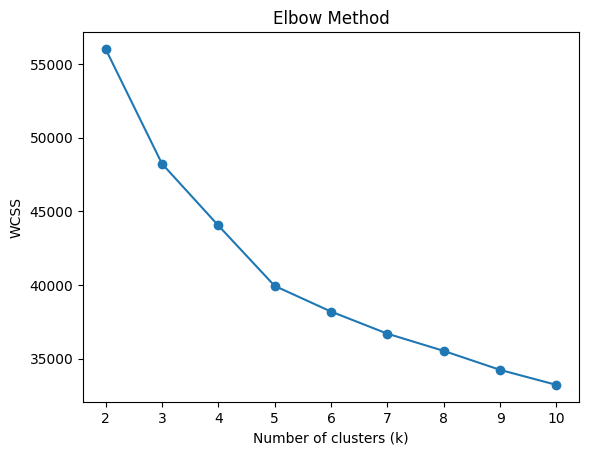

In [12]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [13]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Silhouette score for k={k}: {score:.3f}")


Silhouette score for k=2: 0.172
Silhouette score for k=3: 0.195
Silhouette score for k=4: 0.149
Silhouette score for k=5: 0.165
Silhouette score for k=6: 0.159
Silhouette score for k=7: 0.152
Silhouette score for k=8: 0.143
Silhouette score for k=9: 0.141
Silhouette score for k=10: 0.140


In [15]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)



In [17]:

print("Numeric feature means by cluster:")
print(df_out.groupby("Cluster")[numeric_cols].mean().round(2))

# Most frequent categories
cat_modes = {}
for col in categorical_cols:
    cat_modes[col] = df_out.groupby("Cluster")[col].agg(
        lambda s: s.mode().iat[0] if not s.mode().empty else np.nan
    )
print("Top category per cluster:")
print(pd.DataFrame(cat_modes))


Numeric feature means by cluster:
           Age  Work_Experience  Family_Size
Cluster                                     
0        28.75             1.20         3.81
1        54.65             0.92         2.45
2        37.90             8.21         2.41
Top category per cluster:
         Gender Ever_Married Graduated  Profession Spending_Score  Var_1
Cluster                                                                 
0          Male           No        No  Healthcare            Low  Cat_6
1          Male          Yes       Yes      Artist            Low  Cat_6
2        Female          Yes       Yes      Artist            Low  Cat_6


In [19]:
# Numeric feature means
print("Numeric feature means by cluster:")
print(df_out.groupby("Cluster")[numeric_cols].mean().round(2))

# Most frequent categories
cat_modes = {}
for col in categorical_cols:
    cat_modes[col] = df_out.groupby("Cluster")[col].agg(
        lambda s: s.mode().iat[0] if not s.mode().empty else np.nan
    )
print("Top category per cluster:")
print(pd.DataFrame(cat_modes))


Numeric feature means by cluster:
           Age  Work_Experience  Family_Size
Cluster                                     
0        28.75             1.20         3.81
1        54.65             0.92         2.45
2        37.90             8.21         2.41
Top category per cluster:
         Gender Ever_Married Graduated  Profession Spending_Score  Var_1
Cluster                                                                 
0          Male           No        No  Healthcare            Low  Cat_6
1          Male          Yes       Yes      Artist            Low  Cat_6
2        Female          Yes       Yes      Artist            Low  Cat_6


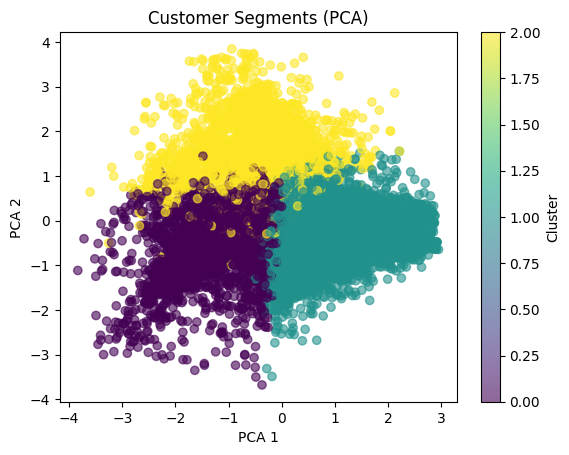

In [22]:
X_dense = X.toarray() if hasattr(X, "toarray") else X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Segments (PCA)")
plt.colorbar(label="Cluster")
plt.show()


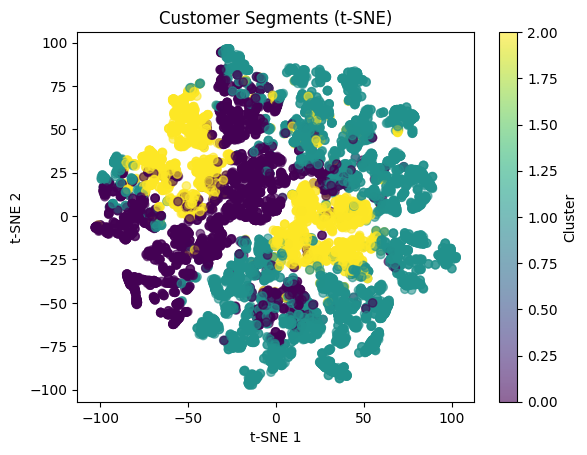

In [23]:
try:
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, random_state=42, init="pca", learning_rate="auto")
    X_tsne = tsne.fit_transform(X_dense)

    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, alpha=0.6)
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title("Customer Segments (t-SNE)")
    plt.colorbar(label="Cluster")
    plt.show()
except Exception as e:
    print("t-SNE skipped:", e)
